## Esercitazione 8  del    23 Aprile 2024


## Condizionamento del problema della soluzione di un sistema lineare

# Esercizio 1
- Costruire la matrice di Vandermonde A, generata dal vettore x=[1.0,2.0,...,6.0] utilizzando la funzione np.vander(x, increasing=True) di numpy. 
- Calcolarne l'indice di condizionamento in norma infinito senza utilizzare la funzione cond di numpy.linalg e poi confrontarne il valore con quello ottenuto utilizzando la funzione.
- Considerare il sistema lineare Ax=b  con matrice dei coefficienti A e termine noto costruito in maniera tale che la soluzione esatta sia il vettore x=[1,1,1,1,1,1] (ogni sua componente è 1) e risolverlo usando il metodo solve del modulo linalg di Scipy.
- perturbare il vettore dei termini noti della quantità
- 
$$
\delta b = 0.025 \, \ast \,
\left [
\begin{array}{c}
1\\
0\\
0\\
0
\end{array}
\right ]
$$
- Risolvere il sistema con termine noto pertubato $b + \delta b$ ((usando il metodo solve del modulo linalg di Scipy).
- Calcolare l'errore relativo sul termine noto e l'errore relativo sulla soluzione. Cosa si può concludere?

N.B. per il calcolo dell'inversa della matrice di A usare la funzione di numpy.linalg.inv(A).


In [121]:
import numpy as np
def calcNormInf(A):
    sums=np.sum(np.abs(A),axis=1)
    return np.max(sums)

In [122]:
import numpy as np
def calcIndiceCondizionamento(A):
    return calcNormInf(A)*calcNormInf(np.linalg.inv(A))

In [123]:
import scipy.linalg as resolver
x=np.arange(1.0,7.0,1)
A=np.vander(x,increasing=True)
print(A)
print("indice di condizionamento calcolato {:e}".format(calcIndiceCondizionamento(A)))
print("indice di condizionamento np.linalg.cond {:e}".format(np.linalg.cond(A,np.inf)))

b=np.sum(A,axis=1)

sol=resolver.solve(A,b)

bCopy=b.copy()
bCopy[0]=bCopy[0]+0.025

solPerturbed=resolver.solve(A,bCopy)

print("norma relativa perturbazione ",np.linalg.norm(bCopy-b,np.inf)/np.linalg.norm(b,np.inf))
# pur essendo una piccola perturbazione la soluzione cambia molto , questo è dovuto dal fatto che il problema è mal condizionato
# e questo lo potevamo capire anche dall'indice di condizionamento di A molto alto 


[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01 2.430e+02]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02 1.024e+03]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02 3.125e+03]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03 7.776e+03]]
indice di condizionamento calcolato 1.204321e+06
indice di condizionamento np.linalg.cond 1.204321e+06
norma relativa perturbazione  2.679241238881187e-06


## Esercizio 2
Assegnato il sistema lineare $Ax = b$, con
$$
A =
\left [
\begin{array}{ccc}
6 & 63 & 662.2\\
63 & 662.2 & 6967.8\\
662.2 & 6967.8 & 73393.5664
\end{array}
\right ], \qquad
b =
\left [
\begin{array}{c}
1.1\\
2.33\\
1.7
\end{array}
\right ]
$$
- trovare il vettore soluzione $x$ (usando il metodo solve del modulo linalg di Scipy);
- perturbare la matrice dei coefficienti della quantità
$$
\delta A =
0.01 \, \ast \,
\left [ \begin{array}{ccc}
1 & 0 & 0\\
0 & 0 & 0\\
0 & 0 & 0
\end{array}
\right ]
$$
quindi calcolare l'errore relativo sulla soluzione e confrontarlo con la
perturbazione relativa sui dati di ingresso. Cosa si osserva?

In [124]:
import scipy.linalg as spi
import numpy as np

A = np.array([[6,63,662.2],[63 , 662.2 , 6967.8],[662.2 , 6967.8 , 73393.5664]])
b = np.array([1.1,2.33,1.7])
x = spi.solve(A,b)
print("indice di condizionamento di A {:e}".format(calcIndiceCondizionamento(A)))
print("soluzione x = ",x)
A_pert = A.copy()
A_pert[0,0] = A[0,0] + 0.01
x_pert = spi.solve(A_pert,b)
print("soluzione perturbata x_pert = ",x_pert)

err_rel_x = np.linalg.norm(x_pert - x, np.inf) / np.linalg.norm(x, np.inf)
err_rel_A = np.linalg.norm(A-A_pert, np.inf) / np.linalg.norm(A, np.inf)
print("errore relativo su x = ",err_rel_x)
print("errore relativo su A = ",err_rel_A)

# stesso discorso di prima , il problema è mal condizionato e quindi piccole perturbazioni portano a grandi errori
# anche se le perturbazioni vengono fatte su A e non su b

indice di condizionamento di A 1.975302e+10
soluzione x =  [136422.3375037  -25999.49955428   1237.44419646]
soluzione perturbata x_pert =  [67.09867276 -9.66739506  0.3124175 ]
errore relativo su x =  0.9995081547935368
errore relativo su A =  1.2342088165597937e-07


## Esercizio 3
 
Assegnato il sistema lineare $Ax = b$, con $A$ matrice di Hilbert di ordine
$4$ e $b = [1, 1, 1, 1]^T$,
 - trovare il vettore soluzione $x$ (usando il metodo solve del modulo linalg di Scipy);
 -  perturbare il vettore dei termini noti della quantità
$$
\delta b = 0.01 \, \ast \,
\left [
\begin{array}{c}
1\\
-1\\
1\\
-1
\end{array}
\right ]
$$
quindi calcolare la soluzione del sistema $A x_p= b_p$ con termine noto $b_p=b+ \delta b$.
Calcolare l'errore relativo sulla soluzione e confrontarlo con la perturbazione relativa sui dati di ingresso. Cosa si osserva?

Nota: per la costruzione della matrice di Hilbert usare la funzione hilbert(n) del modulo scipy.linalg
(scipy.linalg.hilbert(n))  dove bisogna specificare l'ordine n della matrice.

In [125]:
import scipy.linalg as spi
import numpy as np
A = spi.hilbert(4)
b = np.full(4,1)
x = spi.solve(A,b)
print("indice di condizionamento di A {:e}".format(calcIndiceCondizionamento(A)))
print("soluzione x = ",x)

b_pert = b.copy()
b_pert = b_pert + np.array([0.01,-0.01,0.01,-0.01])
print("b perturbato = ",b_pert)
print("b = ",b)
x_pert = spi.solve(A,b_pert)
print("soluzione perturbata x_pert = ",x_pert)
err_rel_x = np.linalg.norm(x_pert - x, np.inf) / np.linalg.norm(x, np.inf)
print("errore relativo su x = ",err_rel_x)
print("errore relativo in percentuale su x = ",err_rel_x*100,"%")

# osservo che ad una perturbazione di b corrispondente a 0.01 (1%) la soluzione invece di variare di 0.01 varia di 0.75 (75%) quindi
# l'errore si propaga molto velocemente , questo è dovuto al fatto che il problema è mal condizionato , infatti l'indice di condizionamento
# è molto alto

indice di condizionamento di A 2.837500e+04
soluzione x =  [  -4.   60. -180.  140.]
b perturbato =  [1.01 0.99 1.01 0.99]
b =  [1 1 1 1]
soluzione perturbata x_pert =  [  1.16   3.   -43.8   51.8 ]
errore relativo su x =  0.7566666666666568
errore relativo in percentuale su x =  75.66666666666568 %


## Metodi diretti per la soluzione numerica di un sistema lineare

## Nota 1.
La funzione *scipy.linalg.lu(A)*  , presa in input una matrice A a rango massimo, restituisce in output le matrici $P^T$,L,U,  della fattorizzazione di LU della matrice A in maniera tale che PA=LU (restituisce la matrice di permutazione trasposta)

In [126]:
import numpy as np
import scipy as sp
from scipy.linalg import lu
A=np.array([[2,1],[3,4]])
PT,L,U=lu(A)  #Restituisce in output la trasposta della matrice di Permutazione
P=PT.T.copy()   #P è la matrice di permutazione
print("A=",A)
print("L=",L)
print("U=",U)
print("P=",P)
#LU è la fattorizzazione di P*A (terorema 2)
A1=P@A # equivale al prodotto matrice x matrice np.dot(P,A)
A1Fatt=L@U # equivale a np.dot(L,U)
print("Matrice P*A \n", A1)
print("Matrice ottenuta moltipicando Le ed U \n",A1Fatt)


A= [[2 1]
 [3 4]]
L= [[1.         0.        ]
 [0.66666667 1.        ]]
U= [[ 3.          4.        ]
 [ 0.         -1.66666667]]
P= [[0. 1.]
 [1. 0.]]
Matrice P*A 
 [[3. 4.]
 [2. 1.]]
Matrice ottenuta moltipicando Le ed U 
 [[3. 4.]
 [2. 1.]]


## Nota 2
La funzione *scipy.linalg.cholesky(a, lower=True)*, presa in input una matrice simmetrica e definta positiva restituisce in output la matrice L triangolare inferiore tale che $A=L \cdot L^T$. Se la matrice in input non è definita positiva, restituisce un errore.

In [127]:
from scipy.linalg import cholesky
A=np.array([[2,1,3],[1,5,7],[3,7,12]])
print(A)

[[ 2  1  3]
 [ 1  5  7]
 [ 3  7 12]]


In [128]:
L=cholesky(A,lower=True)
print(L)
A1=L@L.T
print("A1=\n",A1)

[[1.41421356 0.         0.        ]
 [0.70710678 2.12132034 0.        ]
 [2.12132034 2.59272486 0.8819171 ]]
A1=
 [[ 2.  1.  3.]
 [ 1.  5.  7.]
 [ 3.  7. 12.]]


## Nota 3
La funzione *scipy.linalg.qr(a)*, presa in input una matrice A (nxn)  a rango massimo, restituisce in output le matrici Q (ortogonale di dimensione nxn) ed una matrice R (nxn) triangolare superiore tale che $A=Q \cdot R$

In [129]:
from scipy.linalg import qr
A=np.array([[2,1,3],[1,5,7],[3,7,12]])
Q,R=qr(A)
print("Q=",Q)
print("R=",R)
A1=Q@R
print(A1)

Q= [[-0.53452248  0.6882472  -0.49051147]
 [-0.26726124 -0.6882472  -0.67445327]
 [-0.80178373 -0.22941573  0.55182541]]
R= [[ -3.74165739  -7.48331477 -13.09580085]
 [  0.          -4.35889894  -5.50597761]
 [  0.           0.           0.42919754]]
[[ 2.  1.  3.]
 [ 1.  5.  7.]
 [ 3.  7. 12.]]


## Esercizio 4
- si implementi una function LUsolve(P,A,L,U,b) che risolve il sistema lineare Ax=b nel caso di fattorizzazione $PA = LU$ assegnata,
combinando i metodi di risoluzione in avanti ed all'indietro  implementati nel file SolveTriangular.py.
- si testi sulla matrice A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]]) con termine noto b scelto in maniera tale che la soluzione esatta del sistema lineare sia il vettore formato da tutti 1.

In [130]:
import SolveTriangular as st
import scipy.linalg as sl
import numpy as np
def LUsolve(P,A,L,U,b):
    pb = P@b
    x,flag = st.Lsolve(L,pb)
    if flag != 0:
        return x,flag
    x,flag = st.Usolve(U,x)
    return x,flag


A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]])
b = np.sum(A, axis=1).reshape(-1, 1)
print("b = ",b)
PT,L,U = sl.lu(A)
P = PT.T.copy()
x,flag = LUsolve(P,A,L,U,b)
print("soluzione x = ",x.reshape(-1))

b =  [[22]
 [17]
 [24]
 [21]]
soluzione x =  [1. 1. 1. 1.]


## Esercizio 5
Si implementi una function *solve_nsis(A,B)* per il calcolo della soluzione di un generale sistema lineare $AX = B$, con $X, B$ matrici, che usi la fattorizzazione LU della matrice PA, per risolvere n sistemi lineari: aventi la stessa matrice dei coefficienti A e termine noto l'i-esima colonna della matrice B. 
Utilizzarla poi per il calcolo dell'inversa delle
matrici non singolari
$$
A=\left[
\begin{array}{ccc}
3 & 5 & 7\\
2 & 3 & 4\\
5 & 9 & 11
\end{array}
\right ], \qquad
A=\left[
\begin{array}{cccc}
1 & 2 & 3 & 4\\
2 & -4 & 6 & 8\\
-1 & -2 & -3 & -1\\
5 & 7 & 0 & 1
\end{array}
\right ],
$$
confrontando i risultati ottenuti con l'output
della funzione  *scipy.linalg.inv(A)*

In [131]:
def solve_nsis(A,B):
    m,n=A.shape
    if m!=n:
        return None,1
    
    PT,L,U=sl.lu(A)
    P=PT.T.copy()
    X=np.zeros((n,n))
    for i in range(m):
        x,flag=LUsolve(P,A,L,U,B[:,i])
        if flag != 0:
            return None,flag
        X[:,i]=x.reshape(n,)
    return X,0

A1=np.array([[3 , 5 , 7],[2 , 3 , 4],[5 , 9 , 11]])
B=np.eye(A1.shape[0])
print(solve_nsis(A1,B)[0])
print(spi.solve(A1,B))
A2=np.array([[1 , 2 , 3 , 4],
[2 , -4 , 6 , 8],
[-1 , -2 , -3 , -1],
[5 , 7 , 0 , 1]])
B=np.eye(A2.shape[0])
print(solve_nsis(A2,B)[0])
print(spi.solve(A2,B))



[[-1.5  4.  -0.5]
 [-1.  -1.   1. ]
 [ 1.5 -1.  -0.5]]
[[-1.5  4.  -0.5]
 [-1.  -1.   1. ]
 [ 1.5 -1.  -0.5]]
[[-4.16666667e-01  1.75000000e-01 -6.66666667e-02  2.00000000e-01]
 [ 2.50000000e-01 -1.25000000e-01 -0.00000000e+00 -8.16340459e-18]
 [-1.38888889e-01  2.50000000e-02 -4.22222222e-01 -6.66666667e-02]
 [ 3.33333333e-01  4.62592927e-18  3.33333333e-01 -9.25185854e-18]]
[[-4.16666667e-01  1.75000000e-01 -6.66666667e-02  2.00000000e-01]
 [ 2.50000000e-01 -1.25000000e-01 -6.53072367e-17 -8.16340459e-18]
 [-1.38888889e-01  2.50000000e-02 -4.22222222e-01 -6.66666667e-02]
 [ 3.33333333e-01  4.62592927e-18  3.33333333e-01 -9.25185854e-18]]


## Esercizio 6
Sfruttando la fattorizzazione PA=LU  di una delle matrici del punto precedente, calcolarne il determinante.


In [132]:
def calcDeterminante(A):
    PT,L,U=sl.lu(A)
    det=np.linalg.det(PT.T)*np.prod(np.diag(U))
    return det

A=np.array([[2,1],[3,4]])
print("Determinante calcolato ",calcDeterminante(A))
print("Determinante numpy ",np.linalg.det(A))

Determinante calcolato  5.0
Determinante numpy  5.000000000000001


## Esercizio 7
Per valori di $n = 4 : 6 : 40$, si consideri il sistema lineare $A_n x = b$ con
$A_n$ matrice di Hankel di ordine $n$ di elementi
$$
a^{(n)}_{i,n+k-i}
=
\left \{
\begin{array}{ll}
2^k & \hbox{se} \ k > 0,\\
2^{1/(2-k)} & \hbox{se} \ k \leq 0,
\end{array}
\right .
\qquad
i = 1, ..., n, \ \  k = i + 1-n, ..., i,
$$
e $b$ scelto in modo che risulti $x = [1, 1, ..., 1]^T$. Si risolva tale sistema
con il metodo di fattorizzazione LU della matrice PA
e il metodo di fattorizzazione QR (Q,R  =scipy.linalg.qr(A)).
Calcolare gli errori relativi $\| \delta x \|_2/\|x\|_2$ da cui sono affette
le soluzioni calcolate con i due metodi e produrre, al variare di $n$, un
grafico in scala logaritmica ( matplotlib.plyplot.loglog) degli errori relativi calcolati. Che cosa si
osserva?

NB: per il calcolo della matrice di Hankel utilizzare la function 



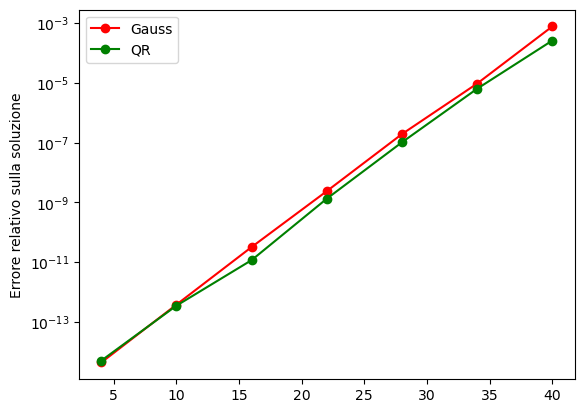

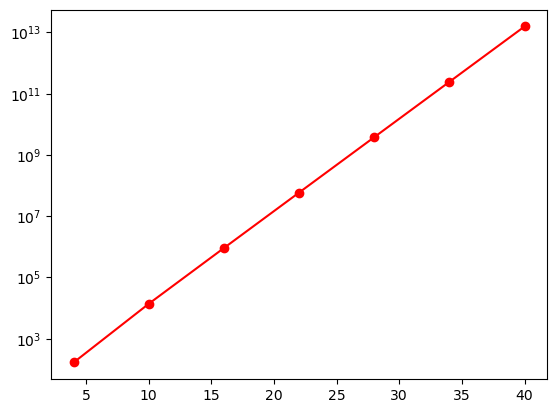

In [133]:
def Hankel(n):
    A=np.zeros((n,n),dtype=float)
    for i in range(0,n):
        for k in range(i+1-n,i+1):
            if k>0:
                A[i,n-1+k-i]=2.0**(k+1)
            else:
                A[i,n-1+k-i]=2.0**(1/(2-k-1))
    return A


indCond=[]
err_rel=[]
err_rel_qr=[]
for n in range(4,41,6):

   A=Hankel(n)
   indCond.append(np.linalg.cond(A,2))
   xesatta=np.ones((n,1))
   b=np.dot(A,xesatta)
   PT,L,U=lu(A)
   P=PT.T
   x,flag=LUsolve(P,A,L,U,b)
    
   err_rel.append(np.linalg.norm(x-xesatta,2)/np.linalg.norm(xesatta,2))
    
   
   Q,R=sp.linalg.qr(A)
   
   y=np.dot(Q.T,b)
   xqr,flag=st.Usolve(R,y)
   err_rel_qr.append(np.linalg.norm(xqr-xesatta,2)/np.linalg.norm(xesatta,2))
   
   
plt.semilogy(range(4,41,6),err_rel,'ro-',range(4,41,6),err_rel_qr,'go-')
plt.legend(['Gauss','QR'])
plt.ylabel('Errore relativo sulla soluzione')
plt.show()
plt.semilogy(range(4,41,6),indCond,'ro-')

#Si noti dall'andamento dell'errore relativo sulla soluzione,come spiegato in teoria, che il metodo QR è più stabile dell'algoritmo di Gauss 
#con pivotaggio

## Esercizio 8

Ripetere l'esercizio precedente per risolvere il sistema lineare $Ax = b$
con $A$ e $b$ cos\`i  definiti:
$$
a^{(n)}_{i,j}=
\left \{
\begin{array}{ll}
1 & \hbox{se} \ i=j \ \hbox{o \, se} \ j=n,\\
-1 & \hbox{se} \ i>j,\\
0 & \hbox{altrimenti}
\end{array}
\right .
\qquad
b = A \cdot [1, ..., 1]^T,
$$
per $n = 48 : 2 : 58$ e $b$ scelto in modo che risulti $x = [1, 1, ..., 1]^T$. Che
cosa si osserva?

indice di condizionamento 1.000000e+00
indice di condizionamento 2.140637e+01
indice di condizionamento 2.590387e+01


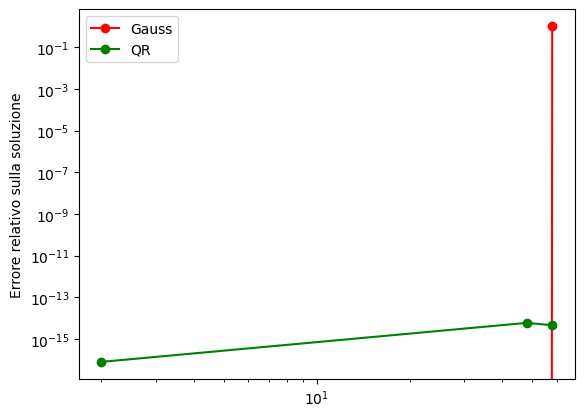

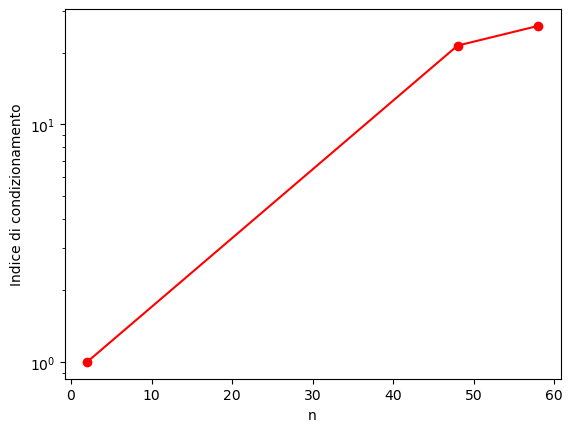

In [134]:
import matplotlib.pyplot as plt
def createA(n):
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if i == j or j==n-1:
                A[i,j] = 1
            elif i > j:
                A[i,j] = -1
            else :
                A[i,j] = 0
    return A

err_rel_qr=[]
err_rel_lu=[]

nValues = np.array([2,48,58])

for i in range(len(nValues)):
    A = createA(nValues[i])
    print("indice di condizionamento {:e}".format(np.linalg.cond(A)))
    xEsatta = np.ones((nValues[i],1))
    b = np.dot(A,xEsatta)
    PT,L,U = lu(A)
    P = PT.T
    x,flag = LUsolve(P,A,L,U,b)
    err_rel_lu.append(np.linalg.norm(x-xEsatta,2)/np.linalg.norm(xEsatta,2))
    Q,R = spi.qr(A)
    y = np.dot(Q.T,b)
    xQR,flag = st.Usolve(R,y)
    err_rel_qr.append(np.linalg.norm(xQR-xEsatta,2)/np.linalg.norm(xEsatta,2))

plt.loglog(nValues,err_rel_lu,'ro-',nValues,err_rel_qr,'go-')
plt.legend(['Gauss','QR'])
plt.ylabel('Errore relativo sulla soluzione')
plt.show()
# osservo che il metodo QR è più stabile del metodo di Gauss con pivotaggio , infatti l'errore relativo sulla soluzione è molto più basso
# per il metodo QR rispetto al metodo di Gauss con pivotaggio
# inoltre questo problema è mal condizionato per i valori alti di n scelti , infatti l'indice di condizionamento aumenta molto velocemente
# all'aumentare di n
plt.semilogy(nValues,[np.linalg.cond(createA(n)) for n in nValues],'ro-')
plt.ylabel('Indice di condizionamento')
plt.xlabel('n')
plt.show()


## Metodi iterativi di Jacobi, Guass-Seidel e Gausseidel_SOR per la soluzione numerica di un sistema lineare

## Esercizio 9
Implementare la  funzione $jacobi(A,b,x0,toll,itmax)$ per risolvere il  sistema lineare Ax=b utilizzando il Metodo iterativo di Jacobi. 
La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- toll: tolleranza per il criterio di arresto
- itmax: iterazioni massime oltre le quali il metodo si ferma

Calcolare il raggio spettrale della matrice di iterazione.

Implementare un criterio di arresto per il procedimento iterativo in termini di : $||x^{(k)}-x^{(k-1)}||/||x^{(k)}|| <toll$

In [135]:
def jacobi(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A)
    n=A.shape[0]
    invM=np.diag(1/d)
    E=np.tril(A,-1)
    F=np.triu(A,1)
    N=-(E+F)
    T=np.dot(invM,N)
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale jacobi", raggiospettrale)
    it=0
    
    er_vet=[]
    while it<=it_max and errore>=toll:
        x=(b+np.dot(N,x0))/d.reshape(n,1)
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

## Esercizio 10
Implementare la  funzione $gauss$_$seidel(A,b,x0,toll,it_max)$ per risolvere il  sistema lineare Ax=b utilizzando il Metodo iterativo di Gauss-Seidel. 
La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- toll: tolleranza per il criterio di arresto
- itmax: iterazioni massime oltre le quali il metodo si ferma

Calcolare il raggio spettrale della matrice di iterazione.

Implementare un criterio di arresto per il procedimento iterativo in termini di : $||x^{(k)}-x^{(k-1)}||/||x^{(k)}|| <toll$

In [136]:
def gauss_seidel(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A)
    D=np.diag(d)
    E=np.tril(A,-1)
    F=np.triu(A,1)
    M=D+E
    N=-F
    T=np.dot(np.linalg.inv(M),N)
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel ",raggiospettrale)
    it=0
    er_vet=[]
    while it<=it_max and errore>=toll:
        temp=b-F@x0
        x,flag=st.Lsolve(M,temp)  #Calcolare la soluzione al passo k equivale a calcolare la soluzione del sistema triangolare con matrice M=D+E
                               # e termine noto b-F@x0
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

## Esercizio 11
Testare i metodi di Jacobi e di Gauss Seidel nella soluzione dei sistemi lineare Ax=b, dove 
- A=np.array([[4,1,3],[3,4,1],[1,1,17]]) 
- A=np.array([[3,0, 4],[7, 4, 3],[-1, -1 ,-2]])
- A=np.array([[5, 0, -1, 2],[ -2, 4, 1, 0],[0, -1, 4, -1],[ 2, 0, 0, 3]])

ed il termine noto del sistema è scelto in maniera tale che la soluzione esatta del sistema sia il vettore fatto da tutti 1.
Visualizzare in un grafico in scala logaritmica  l'errore per ogni iterazione per ciascun metodo. Cosa si osserva?
Porre toll=1e-8 it_max=500 e x0=np.zeros(A.shape[0]

raggio spettrale jacobi 0.5586853131416272
raggio spettrale Gauss-Seidel  0.19431515030791588
soluzione metodo jacobi  [[1.]
 [1.]
 [1.]]
soluzione metodo gauss-seidel  [[1.]
 [1.]
 [1.]]


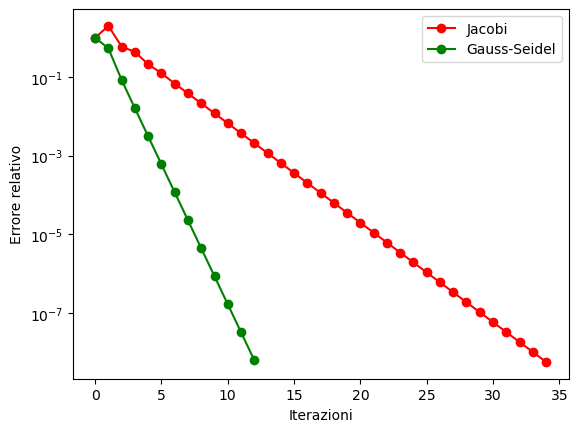

In [137]:
scelta = int(input("scelta matrice"))

if scelta == 1:
    A=np.array([[4,1,3],[3,4,1],[1,1,17]]) 
elif scelta == 2:
    A=np.array([[3,0, 4],[7, 4, 3],[-1, -1 ,-2]])
else : 
    A=np.array([[5, 0, -1, 2],[ -2, 4, 1, 0],[0, -1, 4, -1],[ 2, 0, 0, 3]])

b = np.sum(A,axis=1).reshape(-1,1)
tol = 1e-8
it_max = 500
x0 = np.zeros(A.shape[0]).reshape(-1,1)
x,it,err_vet = jacobi(A,b,x0,tol,it_max)
x_gauss,it_gauss,err_vet_gauss = gauss_seidel(A,b,x0,tol,it_max)
print("soluzione metodo jacobi ",x)
print("soluzione metodo gauss-seidel ",x_gauss)
plt.semilogy(range(it),err_vet,'ro-',range(it_gauss),err_vet_gauss,'go-')
plt.legend(['Jacobi','Gauss-Seidel'])
plt.ylabel('Errore relativo')
plt.xlabel('Iterazioni')
plt.show()

## Esercizio 12
Implementare la  funzione $gauss$_$seidel$_sor(A,b,x0,omega, toll,itmax) per risolvere il  sistema lineare Ax=b utilizzando il Metodo iterativo di Gauss-Seidel-SOR
La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- omega: il parametro di rilassamento
- toll: tolleranza per il criterio di arresto
- itmax: iterazioni massime oltre le quali il metodo si ferma

Restituisce in output
- la soluzione x
- l'errore ad ogni iterazione calcolato come $||x^{(k)}-x^{(k-1)}||/||x^{(k)}||$

Calcolare il raggio spettrale della matrice di iterazione.

Implementare un criterio di arresto per il procedimento iterativo in termini di : $||x^{(k)}-x^{(k-1)}||/||x^{(k)}|| <toll$

In [138]:
def gauss_seidel_sor(A,b,x0,toll,it_max,omega):
    errore=1000
    d=np.diag(A)
    D=np.diag(d)
    Dinv=np.diag(1/d)
    E=np.tril(A,-1)
    F=np.triu(A,1)
    Momega=D+omega*E
    Nomega=(1-omega)*D-omega*F
    T=np.dot(np.linalg.inv(Momega),Nomega)
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel SOR ", raggiospettrale)
    
    M=D+E
    N=-F
    it=0
    xold=x0.copy()
    xnew=x0.copy()
    er_vet=[]
    while it<=it_max and errore>=toll:
        temp=b-F@xold
        xtilde,flag=st.Lsolve(M,temp)
        xnew=(1-omega)*xold+omega*xtilde
        errore=np.linalg.norm(xnew-xold)/np.linalg.norm(xnew)
        er_vet.append(errore)
        xold=xnew.copy()
        it=it+1
    return xnew,it,er_vet

## Esercizio 13
Scrivere una funzione creaPoisson(n) che preso in input l'ordine della matrice quadrata di Poisson la costruzione secondo la seguente formula:
$$A =
\left [
\begin{array}{ccccccccccc}
4 & -1 & 0 & -1 &0 &0 & 0& 0& \cdots &   0 & 0\\
-1 & 4 & -1 & 0  &-1 &0 & 0& 0& \cdots &   0 & 0\\
0 & -1 & 4 & -1  &0 &-1 & 0& 0& \cdots &   0 & 0 \\
-1 & 0 & -1 & 4  &-1 &0  & -1 & 0& \cdots &   0 & 0\\
0 & -1 & 0 & -1  & 4 &-1 & 0 & -1& \cdots &   0 & 0\\
0 & 0 & -1 & 0  & -1 &4 & -1 & 0&  -1 & 0 & 0 \\
0 & 0 & 0 & \ddots  & 0 &\ddots & \ddots & \ddots& \ddots & \ddots & 0\\
0 & 0 & 0 & 0  & -1 &0  & -1 & 4& -1 &   0& -1\\
\end{array}
 \right ], \qquad
$$
- Risolvere il sistema lineare Ax=b con matrice dei coefficienti A di Poisson di ordine 10 e termine noto b scelto in maniera tale che il sistema abbia soluzione il vettore x con tutte le componenti  uguali ad 1, utilizzando  il metodo iterativo di Jacobi, Gauss-Seidel e Gauss-Seidel-Sor con parametro omega scelto tra 1 e 2 in maniera tale che il raggio spettrale della matrice di iterazione sia il più piccolo possibile e confrontare su un unico grafico l'andamento degli errori in scala logaritmica. Usare toll=1e-10.

raggio spettrale Gauss-Seidel  0.7185579379397853
raggio spettrale Gauss-Seidel SOR  0.5939699229429246
raggio spettrale jacobi 0.8451732757464321
soluzione metodo jacobi  [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
soluzione metodo gauss-seidel  [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
soluzione metodo gauss-seidel SOR  [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


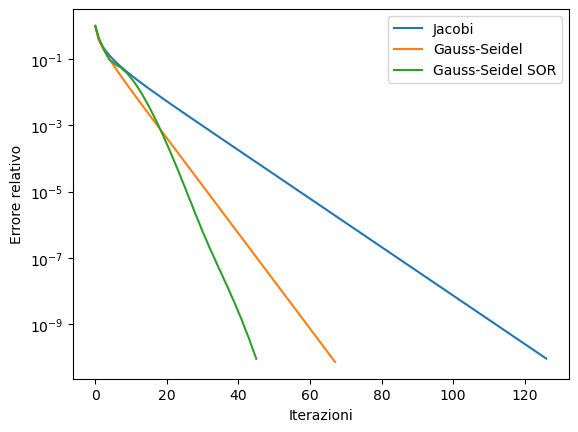

In [141]:
def creaPoisson(n):
    #costruire una matrice di Poisson
    d=np.ones((n))*4
    e=-np.ones((n-1,))
    f=-np.ones((n-3,))
    A=np.diag(d)+np.diag(e,-1)+np.diag(e,1)+np.diag(f,-3)+np.diag(f,3)
    return A

A = creaPoisson(10)
b = np.sum(A,axis=1).reshape(-1,1)
omega = 1.5
x0 = np.zeros(A.shape[0]).reshape(-1,1)
tol = 1e-10
it_max = 500
x_gauss,it_gauss,err_vet_gauss = gauss_seidel(A,b,x0,tol,it_max)
x_sor,it_sor,err_vet_sor = gauss_seidel_sor(A,b,x0,tol,it_max,omega)
x,it,err_vet = jacobi(A,b,x0,tol,it_max)
print("soluzione metodo jacobi ",x)
print("soluzione metodo gauss-seidel ",x_gauss)
print("soluzione metodo gauss-seidel SOR ",x_sor)
plt.semilogy(range(it),err_vet,range(it_gauss),err_vet_gauss,range(it_sor),err_vet_sor)
plt.legend(['Jacobi','Gauss-Seidel','Gauss-Seidel SOR'])
plt.ylabel('Errore relativo')
plt.xlabel('Iterazioni')
plt.show()